## ESSAI 1: 

Essai de départ

- On garde toutes les features possibles
- OrdinalEncoder (pour les catégories) et StandardScaler pour les nombres
- RandomforestClassifier classique 


### PROJET MACHINE LEARNING: 

**Source** : https://www.kaggle.com/datasets/joniarroba/noshowappointments/data

C'est une étude qui donne une liste de rdv médicaux honorés ou non (show/no-show). Les colonnes sont les suivantes: 

- le sexe
- l'âge
- la région (au Brésil)
- un niveau d'études (oui/non)
- une pathologie donnée (Hipertension	Diabetes	Alcoholism)
- une présence de handicap
- l'envoie d'un sms de rappel
- le jour/heure de prise de rdv
- le jour/heure de rdv

## OBJECTIF : 

Nous allons appliquer toutes les étapes vues en séance pour entrainer un modèle de prédiction sur le label "No-show" 
et en gros de prédire pour chaque RDV si No-show == True/False.

## DEMARCHE 

### STRATEGIE / 1° Imports et chargement des données 

RAS + rename

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score

from sklearn.model_selection import GridSearchCV, StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 1. CHARGEMENT DES DONNÉES
print("=== CHARGEMENT DES DONNÉES ===")

try:
    # https://www.kaggle.com/datasets/joniarroba/noshowappointments/data
    path = "no-show.csv"
    df = pd.read_csv(path)
    # rename car y a des titres mal orthographiés
    df = df.rename(columns={'Handcap': 'Handicap', 'Hipertension': 'Hypertension'})


except:
    print("Erreur lors du chargement des données")
    
print( "=" * 80)
print("\n5 Premières lignes:")
print(df.head())
print( "=" * 80)

=== CHARGEMENT DES DONNÉES ===

5 Premières lignes:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No-show  
0         0           0         0         

## STRATEGIE : 2° EXPLORATION RAPIDE

Mettre les metrics et les moyennes générales.

In [3]:
# 2. EXPLORATION RAPIDE
print("\n=== EXPLORATION RAPIDE DES DONNÉES ===")
# Afficher la forme du dataset et les colonnes
print(f"Forme du dataset: {df.shape}")
print("\n")
print(f"Colonnes: {list(df.columns)}")
print("=" * 80)

# Explorer les types de données et les valeurs manquantes
print("\n")
print("\n=> Types de données et valeurs manquantes:\n")
print(df.info())
print("=" * 80)

# Afficher les statistiques descriptives
print("\n")
print("=> Valeurs manquantes:\n")
print(df.isnull().sum())
print("\n=> PAS DE CELLULES VIDES !!")
print("=" * 80)

print("\n=== METRICS GENERALES ===")
# Calcul du taux de No-show
total_rows = len(df)
no_show_count = (df['No-show'] == 'Yes').sum()
no_show_rate = (no_show_count / total_rows) * 100
print(f"\n=> Taux de No Show TOTAL : {no_show_count}/{total_rows} = {no_show_rate:.2f}%")

# Nombre de femmes
femmes_count = (df['Gender'] == 'F').sum()
femmes_rate = (femmes_count / total_rows) * 100
print(f"=> Nombre de Femmes : {femmes_count}/{total_rows} = {femmes_rate:.2f}%")

# Nombre avec Scholarship
scholarship_count = (df['Scholarship'] == 1).sum()
scholarship_rate = (scholarship_count / total_rows) * 100
print(f"=> Population Ayant un certain niveau d'études Scholarship : {scholarship_count}/{total_rows} = {scholarship_rate:.2f}%")

# Nombre avec Hypertension
hypertension_count = (df['Hypertension'] == 1).sum()
hypertension_rate = (hypertension_count / total_rows) * 100
print(f"=> population Ayant de l'hypertension : {hypertension_count}/{total_rows} = {hypertension_rate:.2f}%")

# Nombre avec SMS reçu
sms_count = (df['SMS_received'] == 1).sum()
sms_rate = (sms_count / total_rows) * 100
print(f"=> population Ayant reçu un SMS : {sms_count}/{total_rows} = {sms_rate:.2f}%")

# Nombre avec Handicap
handicap_count = (df['Handicap'] > 0).sum()
handicap_rate = (handicap_count / total_rows) * 100
print(f"=> population Ayant un handicap : {handicap_count}/{total_rows} = {handicap_rate:.2f}%")

# Nombre avec Alcoholism
alcoholism_count = (df['Alcoholism'] == 1).sum()
alcoholism_rate = (alcoholism_count / total_rows) * 100
print(f"=> population Ayant un alcoolisme : {alcoholism_count}/{total_rows} = {alcoholism_rate:.2f}%")

# Nombre avec Diabetes
diabetes_count = (df['Diabetes'] == 1).sum()
diabetes_rate = (diabetes_count / total_rows) * 100
print(f"=> population Ayant un diabète : {diabetes_count}/{total_rows} = {diabetes_rate:.2f}%")



=== EXPLORATION RAPIDE DES DONNÉES ===
Forme du dataset: (110527, 14)


Colonnes: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']



=> Types de données et valeurs manquantes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcohol


## STRATEGIE / 3° Pré - features engineering


### Colonnes du dataset à garder : 

- Gender => M or F	
- Age => int
- Neighbourhood => string	
- Scholarship	
- Hypertension	
- Diabetes	
- Alcoholism	
- Handicap	
- SMS_received	
- No-show

### Nouvelles colonnes à créer :

- "DaysUntilAppointement" => calcul en jours (approx) de AppointmentDay - ScheduledDay


### Colonnes du dataset à virer :

- PatientId	
- AppointmentID	
- ScheduledDay (après avoir créé DaysUntilAppointement)	
- AppointmentDay (après avoir créé DaysUntilAppointement)

=> Le label est "No-show"



### Voir si pas de cellules abbérantes

- No show => Yes/No only
- Age : pas de négatif et pas de + de 115 ans et que des integers 
- Scholarship	/ Hypertension / Diabetes / Alcoholism	/ Handicap	/ SMS_received / No-show : que de 0 ou 1
- Gender: ue des M ou F           
- Neighbourhood doit être une string 
- AppointmentDay et ScheduledDay doivent être du type : 18/05/2016  09:18:03
- 'Handicap' ne contient que les valeurs [0 1 2 3 4]: 

In [4]:
# Contrôle de Y
print("\n=== CONTRÔLE DE VALEURS ABERRANTES POUR LA TARGET NO-SHOW ===")

# Vérification des valeurs uniques dans No-show
unique_values = df['No-show'].unique()
print(f"Valeurs uniques dans 'No-show': {unique_values}")
print(" Contrôle OK : La colonne 'No-show' ne contient que 'Yes' et 'No'")


=== CONTRÔLE DE VALEURS ABERRANTES POUR LA TARGET NO-SHOW ===
Valeurs uniques dans 'No-show': ['No' 'Yes']
 Contrôle OK : La colonne 'No-show' ne contient que 'Yes' et 'No'


In [5]:
print("\n=== CONTRÔLE DE VALEURS ABERRANTES DE X ===")
# on degage les colonnes PatientId et AppointmentID
relevantColumns = ['No-show', 'Scholarship', 'Gender', 'Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']
preSelectedDf = df[relevantColumns].copy()

# Contrôle des colonnes numériques binaires (0/1)
print("\n=> Contrôle Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received:")
binary_columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for col in binary_columns:
    unique_vals = preSelectedDf[col].unique()
    if set(unique_vals).issubset({0, 1}):
        print(f" Contrôle OK : La colonne '{col}' ne contient que des valeurs binaires (0/1)")
    else:
        print(f" Problème détecté : La colonne '{col}' contient des valeurs autres que 0 et 1: {unique_vals}")  

# Contrôle de la colonne 'Handicap'
print("\n=> Contrôle Handicap:")
handicap_vals = preSelectedDf['Handicap'].unique()
expected_handicap = {0, 1, 2, 3, 4}
if set(handicap_vals).issubset(expected_handicap):
    print(f" Contrôle OK : La colonne 'Handicap' contient uniquement des valeurs attendues: {sorted(handicap_vals)}")
else:
    unexpected = set(handicap_vals) - expected_handicap
    print(f" Problème détecté : La colonne 'Handicap' contient des valeurs inattendues: {unexpected}")

# Contrôle de la colonne 'Gender'
print("\n=> Contrôle Gender:")
gender_vals = preSelectedDf['Gender'].unique()
if set(gender_vals) == {'M', 'F'}:
    print(f" Contrôle OK : La colonne 'Gender' ne contient que 'M' et 'F'")
else:
    print(f" Problème détecté : La colonne 'Gender' contient des valeurs autres que M/F: {gender_vals}")

# Contrôle de la colonne 'Neighbourhood'
print("\n=> Contrôle Neighbourhood:")

# Afficher les valeurs uniques
unique_neighbourhoods = preSelectedDf['Neighbourhood'].unique()
nb_unique = preSelectedDf['Neighbourhood'].nunique()
print(f"  Nombre de quartiers uniques: {nb_unique}")
print(f"  Echantillon de 20 quartiers: {sorted(unique_neighbourhoods)[:20]}")

neighbourhood_type = preSelectedDf['Neighbourhood'].dtype
if neighbourhood_type == 'object' or neighbourhood_type == 'string':
    nb_unique = preSelectedDf['Neighbourhood'].nunique()
    print(f" Contrôle OK : La colonne 'Neighbourhood' est de type string avec {nb_unique} quartiers uniques")
else:
    print(f" Problème détecté : La colonne 'Neighbourhood' n'est pas de type string: {neighbourhood_type}")

# Contrôle des colonnes 'AppointmentDay' et 'ScheduledDay'
print("\n=> Contrôle des dates:")
import re
# Pattern pour le format ISO 8601: YYYY-MM-DDTHH:MM:SSZ
date_pattern = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z$'

for col in ['AppointmentDay', 'ScheduledDay']:
    # Afficher un échantillon
    sample_value = str(preSelectedDf[col].iloc[0])
    print(f"  Échantillon de '{col}': {sample_value}")
    
    # Vérifier le type
    if preSelectedDf[col].dtype == 'object':
        print(f"  '{col}' est de type string/object")
        
        # Vérifier le format sur toutes les valeurs
        format_ok = preSelectedDf[col].astype(str).str.match(date_pattern).all()
        
        if format_ok:
            print(f" Toutes les valeurs de '{col}' respectent le format ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)")
        else:
            # Compter combien ne respectent pas le format
            format_issues = (~preSelectedDf[col].astype(str).str.match(date_pattern)).sum()
            print(f" Problème : {format_issues} valeurs ne respectent pas le format ISO 8601")
            # Afficher quelques exemples de valeurs problématiques
            invalid_samples = preSelectedDf[~preSelectedDf[col].astype(str).str.match(date_pattern)][col].head(3)
            print(f"  Exemples de valeurs invalides: {list(invalid_samples)}")
    else:
        print(f"  '{col}' est de type: {preSelectedDf[col].dtype}")

# Contrôle 'Age': pas de négatif et pas de + de 115 ans et que des integers
age_min = preSelectedDf['Age'].min()
age_max = preSelectedDf['Age'].max()
age_dtype = preSelectedDf['Age'].dtype
has_negative = (preSelectedDf['Age'] < 0).any()
has_too_old = (preSelectedDf['Age'] > 115).any()

print(f"\n=> Contrôle de la colonne 'Age':")
print(f"  Type: {age_dtype}, Min: {age_min}, Max: {age_max}")

if has_negative:
    count_negative = (preSelectedDf['Age'] < 0).sum()
    print(f" Problème : {count_negative} valeurs négatives détectées dans 'Age'")
    print("\n=== NETTOYAGE DES DONNÉES ABERRANTES ===")
    # Suppression des lignes avec âge négatif
    nb_rows_before = len(preSelectedDf)
    preSelectedDf = preSelectedDf[preSelectedDf['Age'] >= 0]
    nb_rows_after = len(preSelectedDf)
    nb_deleted = nb_rows_before - nb_rows_after

    if nb_deleted > 0:
        print(f" {nb_deleted} ligne(s) avec Age négatif supprimée(s)")
        print(f"  Nombre de lignes avant: {nb_rows_before}")
        print(f"  Nombre de lignes après: {nb_rows_after}")

else:
    print(f" Pas de valeurs négatives dans 'Age'")

if has_too_old:
    count_too_old = (preSelectedDf['Age'] > 115).sum()
    print(f" Problème : {count_too_old} valeurs > 115 ans détectées dans 'Age'")
else:
    print(f" Pas de valeurs > 115 ans dans 'Age'")




=== CONTRÔLE DE VALEURS ABERRANTES DE X ===

=> Contrôle Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received:
 Contrôle OK : La colonne 'Scholarship' ne contient que des valeurs binaires (0/1)
 Contrôle OK : La colonne 'Hypertension' ne contient que des valeurs binaires (0/1)
 Contrôle OK : La colonne 'Diabetes' ne contient que des valeurs binaires (0/1)
 Contrôle OK : La colonne 'Alcoholism' ne contient que des valeurs binaires (0/1)
 Contrôle OK : La colonne 'SMS_received' ne contient que des valeurs binaires (0/1)

=> Contrôle Handicap:
 Contrôle OK : La colonne 'Handicap' contient uniquement des valeurs attendues: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

=> Contrôle Gender:
 Contrôle OK : La colonne 'Gender' ne contient que 'M' et 'F'

=> Contrôle Neighbourhood:
  Nombre de quartiers uniques: 81
  Echantillon de 20 quartiers: ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERR

In [6]:

print("\n=== CRÉATION DE LA NOUVELLE COLONNE 'DaysUntilAppointement' ===")
# Conversion des colonnes de dates en datetime
preSelectedDf['AppointmentDay'] = pd.to_datetime(preSelectedDf['AppointmentDay'])
preSelectedDf['ScheduledDay'] = pd.to_datetime(preSelectedDf['ScheduledDay'])

# il y a un biais dans les dates car on dans 30% des cas on a ScheduledDay > AppointmentDay, ce qui est impossible.
# et dans la plupart des cas, on a des rdv ayant lieu le même jour que la réservation : 
# 2016-04-29 18:38:08+00:00 > Appointment: 2016-04-29 00:00:00+00:00
# ceci s'explique que les heures de la colonne AppointmentDay sont reset à 00h00, et celles de : ScheduledDay ne le sont pas
# Il faut donc remettre ScheduledDay et AppointmentDayà niveau, et transformer tous ses datetimes en 00:00:00
print("\n=> Reset à zéro heures pour les 2 colonnes:")
preSelectedDf['ScheduledDay'] = preSelectedDf['ScheduledDay'].dt.normalize()
preSelectedDf['AppointmentDay'] = preSelectedDf['AppointmentDay'].dt.normalize()

# Contrôle des dates aberrantes (AppointmentDay < ScheduledDay)
print("\n=> Contrôle des AppointmentDay < ScheduledDay détectées (ANOMALIES):")
dates_aberrantes = preSelectedDf['AppointmentDay'] < preSelectedDf['ScheduledDay']
nb_dates_aberrantes = dates_aberrantes.sum()

if nb_dates_aberrantes > 0:
    print(f" Problème : {nb_dates_aberrantes} ligne(s) où AppointmentDay < ScheduledDay détectées")
    print(f"  Ces lignes seront supprimées")
    
    # Afficher quelques exemples
    exemples = preSelectedDf[dates_aberrantes][['ScheduledDay', 'AppointmentDay']].head(3)
    print(f"\n  Exemples de dates aberrantes:")
    for idx, row in exemples.iterrows():
        print(f"    Scheduled: {row['ScheduledDay']} > Appointment: {row['AppointmentDay']}")
    
    # Suppression des lignes aberrantes
    nb_rows_before = len(preSelectedDf)
    preSelectedDf = preSelectedDf[~dates_aberrantes]
    nb_rows_after = len(preSelectedDf)
    print(f"\n {nb_rows_before - nb_rows_after} ligne(s) supprimée(s)")
    print(f"  Lignes restantes: {nb_rows_after}")
else:
    print(f" Toutes les dates sont cohérentes (AppointmentDay >= ScheduledDay)")

# Calcul de la différence en jours (arrondi au supérieur)
preSelectedDf['DaysUntilAppointement'] = (preSelectedDf['AppointmentDay'] - preSelectedDf['ScheduledDay']).dt.total_seconds() / (24 * 3600)
preSelectedDf['DaysUntilAppointement'] = np.ceil(preSelectedDf['DaysUntilAppointement']).astype(int)

print(f" Colonne 'DaysUntilAppointement' créée avec succès")
print(f"  Min: {preSelectedDf['DaysUntilAppointement'].min()} jours")
print(f"  Max: {preSelectedDf['DaysUntilAppointement'].max()} jours")
print(f"  Moyenne: {preSelectedDf['DaysUntilAppointement'].mean():.2f} jours")

# On supprime les colonnes de dates maintenant qu'on a extrait l'information
print("\n=== SUPPRESSION DES COLONNES 'AppointmentDay', 'ScheduledDay' ===")
preSelectedDf = preSelectedDf.drop(columns=['AppointmentDay', 'ScheduledDay'])
print(f" Colonnes 'AppointmentDay' et 'ScheduledDay' supprimées")
print(f"  Colonnes restantes: {list(preSelectedDf.columns)}")
print("=" * 80)


=== CRÉATION DE LA NOUVELLE COLONNE 'DaysUntilAppointement' ===

=> Reset à zéro heures pour les 2 colonnes:

=> Contrôle des AppointmentDay < ScheduledDay détectées (ANOMALIES):
 Problème : 5 ligne(s) où AppointmentDay < ScheduledDay détectées
  Ces lignes seront supprimées

  Exemples de dates aberrantes:
    Scheduled: 2016-05-10 00:00:00+00:00 > Appointment: 2016-05-09 00:00:00+00:00
    Scheduled: 2016-05-18 00:00:00+00:00 > Appointment: 2016-05-17 00:00:00+00:00
    Scheduled: 2016-05-05 00:00:00+00:00 > Appointment: 2016-05-04 00:00:00+00:00

 5 ligne(s) supprimée(s)
  Lignes restantes: 110521
 Colonne 'DaysUntilAppointement' créée avec succès
  Min: 0 jours
  Max: 179 jours
  Moyenne: 10.18 jours

=== SUPPRESSION DES COLONNES 'AppointmentDay', 'ScheduledDay' ===
 Colonnes 'AppointmentDay' et 'ScheduledDay' supprimées
  Colonnes restantes: ['No-show', 'Scholarship', 'Gender', 'Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Neighbourhood', 'DaysUnti

## DATAVIZ ET EDA 

=> pour distinguer des premiers comportements. Pistes de datavizen vue d'en extirper des corrélations hypothétiques : 

- Distribution des ages de l'échantillon 
- Rapport Gender (H/F) VS No-show 
- durée d'attente (DaysUntilAppointement) VS No-show 
- SMS_received vs no show
- un scatter de l'âge + sexe 
- Répartition nombre de régions uniques 
- Camembert de régions 
- régions VS No-show 
- Scholarship VS No-show 
- Ratio de no-show par pathologie



=== ANALYSE EXPLORATOIRE DÉTAILLÉE (EDA) ===


/tmp/ipykernel_18145/261727354.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_data, yes_data], labels=['Présent', 'Absent'])


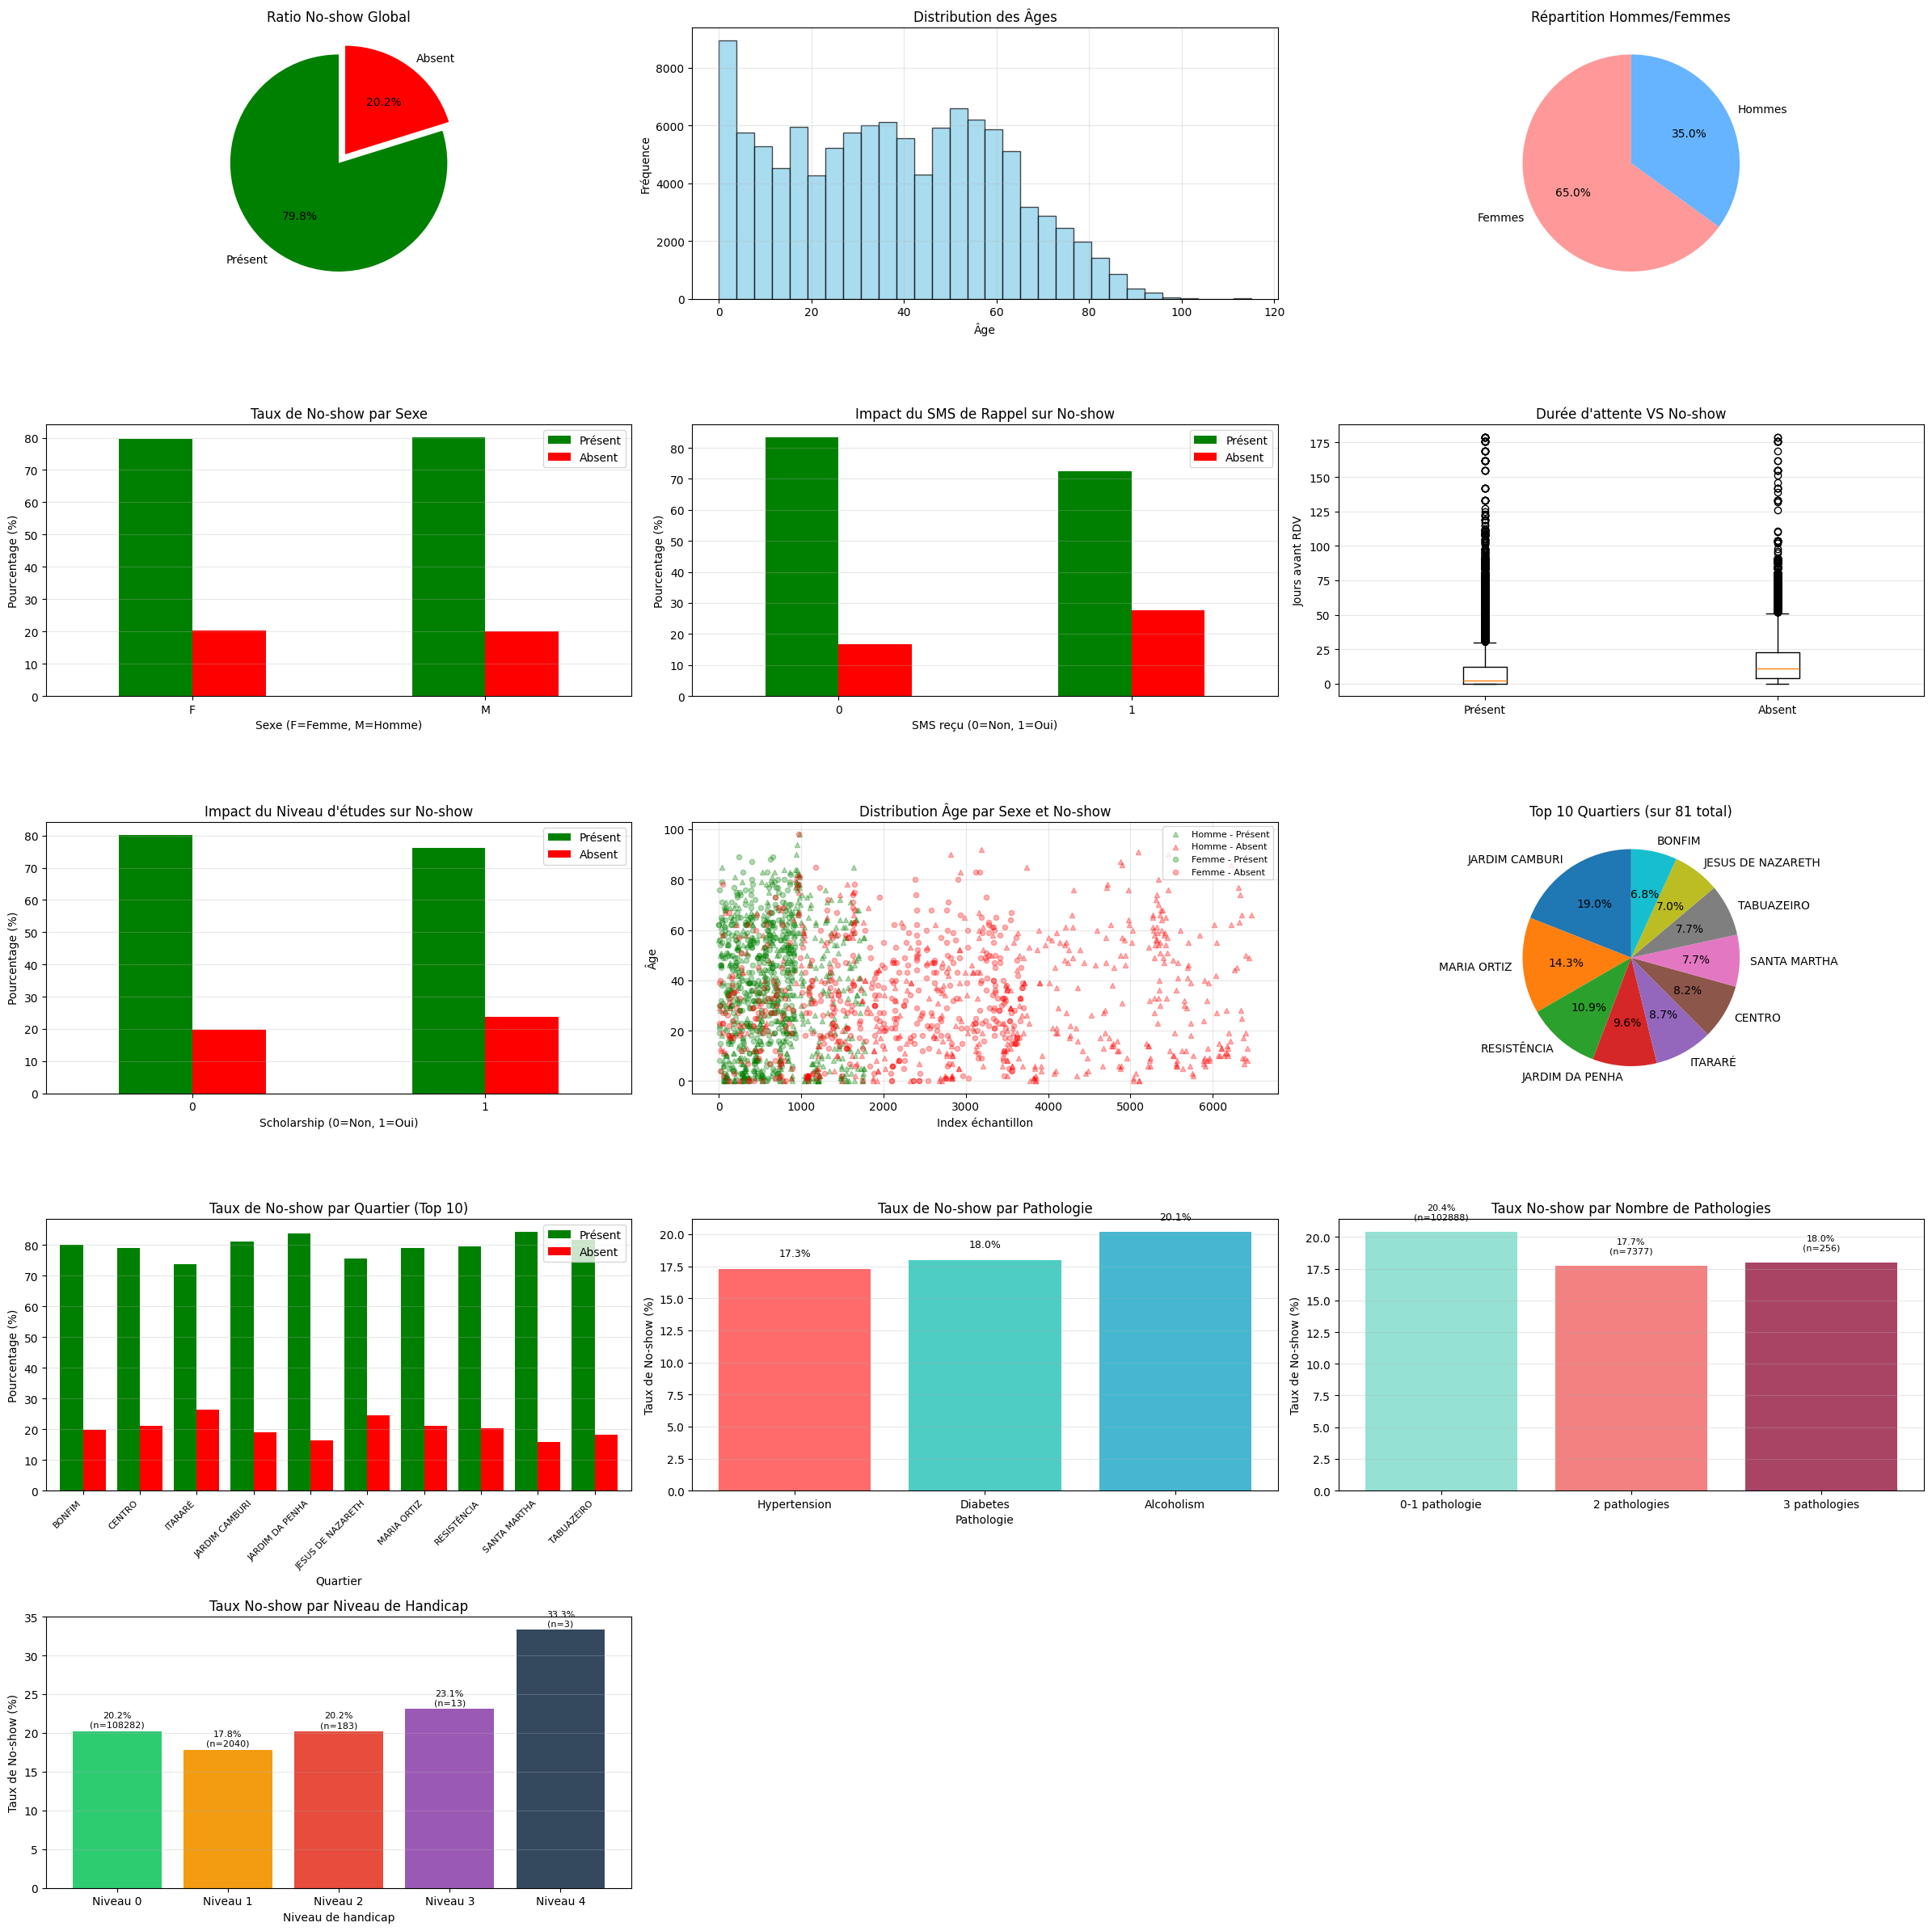


=== RÉSUMÉ DES OBSERVATIONS ===

 Dataset: 110,521 rendez-vous médicaux
 Taux de No-show: 20.19%

 Démographie:
   • Femmes: 65.0% | Hommes: 35.0%
   • Âge moyen: 37.1 ans
   • Âge médian: 37 ans
   • Âge le plus représenté = 0 ans
   • Les femmes et les hommes ont des taux de no-show très similaires (~20% chacun).
    • Le scatter age/sexe montre que le no-show (points rouges) est réparti sur toutes les tranches d'âge sans pattern évident. Aucun groupe démographique (âge + sexe) ne semble particulièrement à risque.

 Impact SMS:
   • Avec SMS: 27.57% no-show
   • Sans SMS: 16.70% no-show
   • Différence: 10.88 points
 => X : COMPORTEMENT ANORMAL (ce point sera développé par la suite)

 Pathologies:
   • Hypertension: 17.30% no-show (21801 patients)
   • Diabetes: 18.00% no-show (7943 patients)
   • Alcoholism: 20.15% no-show (3360 patients)

 Multi-pathologies:
   • Patients avec 2 pathologies: 7377 (17.70% no-show)
   • Patients avec 3 pathologies: 256 (17.97% no-show)
   • Les pati

In [7]:
print("\n=== ANALYSE EXPLORATOIRE DÉTAILLÉE (EDA) ===")

# Configuration générale des graphiques
plt.figure(figsize=(24, 24))

# 1. Ratio No-show sur le total (camembert)
plt.subplot(5, 3, 1)
noshow_counts = preSelectedDf['No-show'].value_counts()
plt.pie(noshow_counts.values, labels=['Présent', 'Absent'], autopct='%1.1f%%', 
        colors=['green', 'red'], startangle=90, explode=(0, 0.1))
plt.title('Ratio No-show Global')

# 2. Distribution des âges (histogramme)
plt.subplot(5, 3, 2)
plt.hist(preSelectedDf['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution des Âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)

# 3. Ratio H/F (pie chart)
plt.subplot(5, 3, 3)
gender_counts = preSelectedDf['Gender'].value_counts()
plt.pie(gender_counts.values, labels=['Femmes', 'Hommes'], autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff'], startangle=90)
plt.title('Répartition Hommes/Femmes')

# 4. Proportions Gender VS No-show (bar chart)
plt.subplot(5, 3, 4)
gender_noshow = pd.crosstab(preSelectedDf['Gender'], preSelectedDf['No-show'], normalize='index') * 100
gender_noshow.plot(kind='bar', ax=plt.gca(), color=['green', 'red'])
plt.title('Taux de No-show par Sexe')
plt.xlabel('Sexe (F=Femme, M=Homme)')
plt.ylabel('Pourcentage (%)')
plt.legend(['Présent', 'Absent'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# 5. SMS de rappel VS No-show
plt.subplot(5, 3, 5)
sms_noshow = pd.crosstab(preSelectedDf['SMS_received'], preSelectedDf['No-show'], normalize='index') * 100
sms_noshow.plot(kind='bar', ax=plt.gca(), color=['green', 'red'])
plt.title('Impact du SMS de Rappel sur No-show')
plt.xlabel('SMS reçu (0=Non, 1=Oui)')
plt.ylabel('Pourcentage (%)')
plt.legend(['Présent', 'Absent'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# 6. Durée d'attente VS No-show (boxplot)
plt.subplot(5, 3, 6)
no_data = preSelectedDf[preSelectedDf['No-show'] == 'No']['DaysUntilAppointement']
yes_data = preSelectedDf[preSelectedDf['No-show'] == 'Yes']['DaysUntilAppointement']
plt.boxplot([no_data, yes_data], labels=['Présent', 'Absent'])
plt.title('Durée d\'attente VS No-show')
plt.ylabel('Jours avant RDV')
plt.grid(True, alpha=0.3, axis='y')

# 7. Diplomés (Scholarship) VS No-show
plt.subplot(5, 3, 7)
scholar_noshow = pd.crosstab(preSelectedDf['Scholarship'], preSelectedDf['No-show'], normalize='index') * 100
scholar_noshow.plot(kind='bar', ax=plt.gca(), color=['green', 'red'])
plt.title('Impact du Niveau d\'études sur No-show')
plt.xlabel('Scholarship (0=Non, 1=Oui)')
plt.ylabel('Pourcentage (%)')
plt.legend(['Présent', 'Absent'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# 8. Scatter Age et Sexe (avec couleur pour no-show)
plt.subplot(5, 3, 8)
for gender in ['M', 'F']:
    for noshow in ['No', 'Yes']:
        mask = (preSelectedDf['Gender'] == gender) & (preSelectedDf['No-show'] == noshow)
        color = 'red' if noshow == 'Yes' else 'green'
        marker = 'o' if gender == 'F' else '^'
        alpha = 0.3
        label = f"{'Femme' if gender == 'F' else 'Homme'} - {'Absent' if noshow == 'Yes' else 'Présent'}"
        plt.scatter(preSelectedDf[mask].index[:500], preSelectedDf[mask]['Age'][:500], 
                   c=color, marker=marker, alpha=alpha, s=20, label=label)
plt.title('Distribution Âge par Sexe et No-show')
plt.xlabel('Index échantillon')
plt.ylabel('Âge')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 9. Répartition des régions (top 10 en pie chart)
plt.subplot(5, 3, 9)
top_neighbourhoods = preSelectedDf['Neighbourhood'].value_counts().head(10)
plt.pie(top_neighbourhoods.values, labels=top_neighbourhoods.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top 10 Quartiers (sur {preSelectedDf["Neighbourhood"].nunique()} total)')

# 10. Régions VS No-show (top 10 régions)
plt.subplot(5, 3, 10)
top_10_regions = preSelectedDf['Neighbourhood'].value_counts().head(10).index
df_top_regions = preSelectedDf[preSelectedDf['Neighbourhood'].isin(top_10_regions)]
region_noshow = pd.crosstab(df_top_regions['Neighbourhood'], df_top_regions['No-show'], normalize='index') * 100
region_noshow.plot(kind='bar', ax=plt.gca(), color=['green', 'red'], width=0.8)
plt.title('Taux de No-show par Quartier (Top 10)')
plt.xlabel('Quartier')
plt.ylabel('Pourcentage (%)')
plt.legend(['Présent', 'Absent'], loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# 11. Ratio de no-show par pathologie (Hypertension, Diabetes, Alcoholism)
plt.subplot(5, 3, 11)
pathologies = ['Hypertension', 'Diabetes', 'Alcoholism']
noshow_rates = []
for pathology in pathologies:
    rate = (preSelectedDf[preSelectedDf[pathology] == 1]['No-show'] == 'Yes').mean() * 100
    noshow_rates.append(rate)
colors_bar = ['#ff6b6b', '#4ecdc4', '#45b7d1']
plt.bar(pathologies, noshow_rates, color=colors_bar)
plt.title('Taux de No-show par Pathologie')
plt.xlabel('Pathologie')
plt.ylabel('Taux de No-show (%)')
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(noshow_rates):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

# 12. Taux de no-show pour patients avec 2+ pathologies
plt.subplot(5, 3, 12)
# Créer une colonne pour compter le nombre de pathologies
preSelectedDf['nb_pathologies'] = (preSelectedDf['Hypertension'] + 
                                    preSelectedDf['Diabetes'] + 
                                    preSelectedDf['Alcoholism'])

# Patients avec exactement 2 pathologies
patients_2_patho = preSelectedDf[preSelectedDf['nb_pathologies'] == 2]
rate_2_patho = (patients_2_patho['No-show'] == 'Yes').mean() * 100
count_2_patho = len(patients_2_patho)

# Patients avec 3 pathologies
patients_3_patho = preSelectedDf[preSelectedDf['nb_pathologies'] == 3]
rate_3_patho = (patients_3_patho['No-show'] == 'Yes').mean() * 100
count_3_patho = len(patients_3_patho)

# Patients avec 0 ou 1 pathologie pour comparaison
patients_0_1_patho = preSelectedDf[preSelectedDf['nb_pathologies'] <= 1]
rate_0_1_patho = (patients_0_1_patho['No-show'] == 'Yes').mean() * 100

categories = ['0-1 pathologie', '2 pathologies', '3 pathologies']
rates = [rate_0_1_patho, rate_2_patho, rate_3_patho]
colors_multi = ['#95e1d3', '#f38181', '#aa4465']
bars = plt.bar(categories, rates, color=colors_multi)
plt.title('Taux No-show par Nombre de Pathologies')
plt.ylabel('Taux de No-show (%)')
plt.grid(True, alpha=0.3, axis='y')
for i, (bar, rate) in enumerate(zip(bars, rates)):
    count = len(patients_0_1_patho) if i == 0 else (count_2_patho if i == 1 else count_3_patho)
    plt.text(bar.get_x() + bar.get_width()/2, rate + 1, 
             f'{rate:.1f}%\n(n={count})', ha='center', fontsize=8)

# 13. Taux de no-show par niveau de handicap
plt.subplot(5, 3, 13)
handicap_noshow = []
handicap_labels = []
handicap_counts = []
for level in sorted(preSelectedDf['Handicap'].unique()):
    patients_handicap = preSelectedDf[preSelectedDf['Handicap'] == level]
    if len(patients_handicap) > 0:
        rate = (patients_handicap['No-show'] == 'Yes').mean() * 100
        handicap_noshow.append(rate)
        handicap_labels.append(f'Niveau {int(level)}')
        handicap_counts.append(len(patients_handicap))

colors_handicap = ['#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#34495e']
bars_h = plt.bar(handicap_labels, handicap_noshow, color=colors_handicap[:len(handicap_labels)])
plt.title('Taux No-show par Niveau de Handicap')
plt.xlabel('Niveau de handicap')
plt.ylabel('Taux de No-show (%)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
for bar, rate, count in zip(bars_h, handicap_noshow, handicap_counts):
    plt.text(bar.get_x() + bar.get_width()/2, rate + 0.5, 
             f'{rate:.1f}%\n(n={count})', ha='center', fontsize=8)

total = len(preSelectedDf)
noshow_rate = (preSelectedDf['No-show'] == 'Yes').mean() * 100
female_rate = (preSelectedDf['Gender'] == 'F').mean() * 100
sms_rate = (preSelectedDf['SMS_received'] == 1).mean() * 100
avg_wait = preSelectedDf['DaysUntilAppointement'].mean()
noshow_sms = (preSelectedDf[preSelectedDf['SMS_received'] == 1]['No-show'] == 'Yes').mean() * 100
noshow_no_sms = (preSelectedDf[preSelectedDf['SMS_received'] == 0]['No-show'] == 'Yes').mean() * 100

plt.tight_layout()
plt.show()

# Analyse textuelle complémentaire
print("\n=== RÉSUMÉ DES OBSERVATIONS ===")
print(f"\n Dataset: {len(preSelectedDf):,} rendez-vous médicaux")
print(f" Taux de No-show: {noshow_rate:.2f}%")
print(f"\n Démographie:")
print(f"   • Femmes: {female_rate:.1f}% | Hommes: {100-female_rate:.1f}%")
print(f"   • Âge moyen: {preSelectedDf['Age'].mean():.1f} ans")
print(f"   • Âge médian: {preSelectedDf['Age'].median():.0f} ans")
print(f"   • Âge le plus représenté = 0 ans")
print(f"   • Les femmes et les hommes ont des taux de no-show très similaires (~20% chacun).")
print("    • Le scatter age/sexe montre que le no-show (points rouges) est réparti sur toutes les tranches d'âge sans pattern évident. Aucun groupe démographique (âge + sexe) ne semble particulièrement à risque.")

print(f"\n Impact SMS:")
print(f"   • Avec SMS: {noshow_sms:.2f}% no-show")
print(f"   • Sans SMS: {noshow_no_sms:.2f}% no-show")
print(f"   • Différence: {abs(noshow_sms - noshow_no_sms):.2f} points")

print(" => X : COMPORTEMENT ANORMAL (ce point sera développé par la suite)")

print(f"\n Pathologies:")
for pathology in pathologies:
    rate = (preSelectedDf[preSelectedDf[pathology] == 1]['No-show'] == 'Yes').mean() * 100
    count = (preSelectedDf[pathology] == 1).sum()
    print(f"   • {pathology}: {rate:.2f}% no-show ({count} patients)")

print(f"\n Multi-pathologies:")
print(f"   • Patients avec 2 pathologies: {count_2_patho} ({rate_2_patho:.2f}% no-show)")
print(f"   • Patients avec 3 pathologies: {count_3_patho} ({rate_3_patho:.2f}% no-show)")
print("   • Les patients avec pathologies multiples (Hypertension, Diabetes, Alcoholism) ont des taux de no-show légèrement inférieurs (17-18%) à la moyenne (20%).")

print(f"\n Handicap:")
for level in sorted(preSelectedDf['Handicap'].unique()):
    patients = preSelectedDf[preSelectedDf['Handicap'] == level]
    rate = (patients['No-show'] == 'Yes').mean() * 100
    print(f"   • Niveau {int(level)}: {rate:.2f}% no-show ({len(patients)} patients)")

print(f"\n DaysUntilAppointement:")
print(f"   •Les patients absents ont un délai médian plus élevé entre réservation et RDV. Plus l'attente est longue, plus le risque d'oubli ou de changement de situation augmente. C'est un facteur prédictif important.")
print(f"\n Quartiers :")
print("   •Les taux varient entre ~18% et ~22% selon les quartiers. La variation est modérée, suggérant que la géographie a un impact mais n'est pas déterminante. Certains quartiers (comme JARDIM CAMBURI) ont des taux légèrement plus élevés.")

print(
    """
        Features pertinentes :
         DaysUntilAppointement (impact fort)
         Neighbourhood (effet modéré)
         Pathologies (effet faible mais présent)

        Features peu discriminantes :
         Gender (quasi-neutre)
         Age (pas de pattern clair)
""")






### Résultat contre-intuitif majeur : Les patients qui reçoivent un SMS ont un taux de no-show plus élevé (27%) que ceux qui n'en reçoivent pas (16%).

- Les données montrent que les RDV ayant reçus un SMS sont minoritaires (32% des cas)

### Explications ici : https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/49775

"If you look at the group of people who scheduled an appointment on the same day of the appointment (days between making of the appointment and the appointment itself = 0) you will see that no one in the group received an SMS, and only less than 5% of them didn't show up.

Notice that this group of people who scheduled an appointment on the same day of the appointment comprise about ~35% of the whole data set! So it makes sense."


"After that data cleanup I also saw that SMS rates for people who make the appointment for the same day or within three days are exceptionally low - I also saw that no show rates are much lower in that time range. 

After accounting for the data cleanup and days between scheduling/appointment (as well as age and scholarship), I actually found that the no show rate was 22% lower for those with SMS = 1 than 0."


In [8]:
# Analyse du taux de no-show et SMS selon DaysUntilAppointement
print("\n=== EXPLICATION DU COMPORTEMENT DE SMS RECEIVED VS DAYSUNTILAPPOINTEMENT ===")

for days in [0, 1, 2, 3]:
    # Filtrer les patients avec ce délai
    patients_day = preSelectedDf[preSelectedDf['DaysUntilAppointement'] == days]
    
    if len(patients_day) > 0:        
        # Taux de SMS reçu
        sms_count = (patients_day['SMS_received'] == 1).sum()
        sms_rate = (sms_count / len(patients_day)) * 100
        
        print(f"\n DaysUntilAppointement = {days} jour(s)")
        print(f"   • Nombre de RDV: {len(patients_day):,}")
        print(f"   • Taux de SMS reçu: {sms_rate:.2f}% ({sms_count:,} SMS)")
    else:
        print(f"\n DaysUntilAppointement = {days} jour(s): Aucune donnée")

print("\n" + "=" * 80)
print("\n OBSERVATIONS:")
print("   • Sur le délai (0-2 jour), aucun SMS de rappel n'est envoyé")
print("=" * 80)

# Moyenne des no-show pour DaysUntilAppointement 0, 1 ou 2
print("\n=== MOYENNE NO-SHOW POUR LES RDV À COURT TERME (0-2 jours) ===")
patients_short_term = preSelectedDf[preSelectedDf['DaysUntilAppointement'].isin([0, 1, 2])]
if len(patients_short_term) > 0:
    noshow_count_short = (patients_short_term['No-show'] == 'Yes').sum()
    noshow_rate_short = (noshow_count_short / len(patients_short_term)) * 100
    
    print(f" Population DaysUntilAppointement = 0, 1 ou 2 jours:")
    print(f"   • Nombre total de RDV: {len(patients_short_term):,}")
    print(f"   • Nombre de no-show: {noshow_count_short:,}")
    print(f"   • Taux moyen de no-show: {noshow_rate_short:.2f}%")
    print(f"\n Comparaison avec la moyenne globale ({noshow_rate:.2f}%):")
    diff = noshow_rate_short - noshow_rate
    if diff < 0:
        print(f"    Taux inférieur de {abs(diff):.2f} points (RDV à court terme plus fiables)")
    else:
        print(f"    Taux supérieur de {diff:.2f} points")
else:
    print("Aucune donnée pour DaysUntilAppointement = 0, 1 ou 2")

print("=" * 80)




=== EXPLICATION DU COMPORTEMENT DE SMS RECEIVED VS DAYSUNTILAPPOINTEMENT ===

 DaysUntilAppointement = 0 jour(s)
   • Nombre de RDV: 38,562
   • Taux de SMS reçu: 0.00% (0 SMS)

 DaysUntilAppointement = 1 jour(s)
   • Nombre de RDV: 5,213
   • Taux de SMS reçu: 0.00% (0 SMS)

 DaysUntilAppointement = 2 jour(s)
   • Nombre de RDV: 6,725
   • Taux de SMS reçu: 0.00% (0 SMS)

 DaysUntilAppointement = 3 jour(s)
   • Nombre de RDV: 2,737
   • Taux de SMS reçu: 33.10% (906 SMS)


 OBSERVATIONS:
   • Sur le délai (0-2 jour), aucun SMS de rappel n'est envoyé

=== MOYENNE NO-SHOW POUR LES RDV À COURT TERME (0-2 jours) ===
 Population DaysUntilAppointement = 0, 1 ou 2 jours:
   • Nombre total de RDV: 50,500
   • Nombre de no-show: 4,507
   • Taux moyen de no-show: 8.92%

 Comparaison avec la moyenne globale (20.19%):
    Taux inférieur de 11.27 points (RDV à court terme plus fiables)


In [9]:
# SUPPRESSION DE LA COLONNE Sms_received car valeur biaisée
print("\n=== SUPPRESSION DE LA COLONNE 'SMS_received' ===")
preSelectedDf = preSelectedDf.drop(columns=['SMS_received'])
print(f" Colonne 'SMS_received' supprimée")
print(f"  Colonnes restantes: {list(preSelectedDf.columns)}")
print("=" * 80)


=== SUPPRESSION DE LA COLONNE 'SMS_received' ===
 Colonne 'SMS_received' supprimée
  Colonnes restantes: ['No-show', 'Scholarship', 'Gender', 'Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Neighbourhood', 'DaysUntilAppointement', 'nb_pathologies']


## STRATEGIE 4° / PIPELINE : 

- One Hot encoder pour les colonnes catégorielles à nombre de classes limitées ('Scholarship', 'Gender', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'nb_pathologies')
- Label pour les colonnes catégorielles à nombre de classes trop larges (Neighbourhood)
- SimpleImputer  pour les colonnes numériques (Age et DaysUntilAppointement)


In [10]:

# # 4. CRÉATION DU PIPELINE DE PREPROCESSING
print("\n=== CRÉATION DU PIPELINE ===")

# # Identification des colonnes catégorielles-small, catégorielles-large et numériques
categorical_features = ['Neighbourhood', 'Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'nb_pathologies']
numerical_features = ['Age', 'DaysUntilAppointement']

# # Pipeline pour les données catégorielles (Ordinal Encoding)
# Note: OrdinalEncoder est utilisé au lieu de LabelEncoder car il supporte les DataFrames multi-colonnes
# nécessaires pour ColumnTransformer, contrairement à LabelEncoder qui ne fonctionne que sur des arrays 1D
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Pipeline pour les données numériques (Standardisation)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# # Preprocessing complet avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ],
    remainder='passthrough')



=== CRÉATION DU PIPELINE ===


In [11]:
# On isole la target et les features
features = ['Scholarship', 'Gender', 'Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Neighbourhood', 'DaysUntilAppointement', 'nb_pathologies']
X = preSelectedDf[features].copy()
y = preSelectedDf['No-show']
print("=" * 80)

# 5. DIVISION TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Taille train: {X_train.shape[0]} échantillons")
print(f"Taille test: {X_test.shape[0]} échantillons")

print(X_train.head())

Taille train: 88416 échantillons
Taille test: 22105 échantillons
       Scholarship Gender  Age  Hypertension  Diabetes  Alcoholism  Handicap  \
46757            0      F   74             1         1           0         0   
58860            0      F   61             0         0           0         0   
25707            0      F   21             0         0           0         0   
88579            0      M    7             0         0           0         0   
57366            0      F    6             0         0           0         0   

      Neighbourhood  DaysUntilAppointement  nb_pathologies  
46757     DO QUADRO                     35               2  
58860    DE LOURDES                      1               0  
25707      SÃO JOSÉ                     14               0  
88579    INHANGUETÁ                     20               0  
57366   MARIA ORTIZ                     36               0  


## STRATEGIE GRIDSEARCH 

Pour l'instant, on applique le gridSearchCv à RandomForestClassifier, mais on testera avec d'autres modèles

In [12]:

print("\n=== GRIDS SEARCH POUR HYPERPARAMÈTRES basé sur RandomForestClassifier===")
# Définition du modèle de base
model = RandomForestClassifier(random_state=42)
# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Configuration de la validation croisée
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

# Grille de recherche
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring="accuracy", cv=cv_strategy, n_jobs=-1, verbose=2)

# Entraînement du modèle avec GridSearch
grid_search.fit(preprocessor.fit_transform(X_train), y_train)

# Meilleurs hyperparamètres
print("\nMeilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)

# Meilleur score
print(f"Meilleur score de validation: {grid_search.best_score_:.2%}")

# Entraînement du modèle avec les meilleurs hyperparamètres

best_model = grid_search.best_estimator_


=== GRIDS SEARCH POUR HYPERPARAMÈTRES basé sur RandomForestClassifier===


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.6s
[CV] END max_dep

In [13]:
# 6. CRÉATION DU MODÈLE COMPLET (Pipeline + ML)
print("\n=== CRÉATION DU MODÈLE ===")

# Pipeline complet: preprocessing + modèle
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ('classifier', best_model)
])


=== CRÉATION DU MODÈLE ===


In [14]:
# 7. CROSS-VALIDATION
print("\n=== CROSS-VALIDATION ===")

# Configuration de la cross-validation stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scores de cross-validation avec F1 pour la classe 'Yes'
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Scores CV: {cv_scores}")
print(f"Score CV moyen: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


=== CROSS-VALIDATION ===
Scores CV: [0.79851843 0.79856359 0.79748911 0.79946842 0.79918566]
Score CV moyen: 0.7986 (+/- 0.0014)


In [15]:
# 8. ENTRAÎNEMENT DU MODÈLE FINAL
print("\n=== ENTRAÎNEMENT DU MODÈLE ===")

model_pipeline.fit(X_train, y_train)
print("Modèle entraîné avec succès!")


=== ENTRAÎNEMENT DU MODÈLE ===
Modèle entraîné avec succès!


In [16]:
# 9. PRÉDICTIONS
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

In [17]:
# 10. ÉVALUATION COMPLÈTE
print("\n=== ÉVALUATION DU MODÈLE ===")

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy Train: {train_accuracy:.4f}")
print(f"Accuracy Test: {test_accuracy:.4f}")

# Rapport de classification détaillé
print("\nRapport de classification (Test):")
print(classification_report(y_test, y_pred_test, 
                          target_names=['RDV honoré', 'RDV manqué']))

# Matrice de confusion
print("\nMatrice de confusion:")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


=== ÉVALUATION DU MODÈLE ===
Accuracy Train: 0.8185
Accuracy Test: 0.8000

Rapport de classification (Test):
              precision    recall  f1-score   support

  RDV honoré       0.80      0.99      0.89     17642
  RDV manqué       0.56      0.04      0.08      4463

    accuracy                           0.80     22105
   macro avg       0.68      0.52      0.48     22105
weighted avg       0.75      0.80      0.72     22105


Matrice de confusion:
[[17496   146]
 [ 4276   187]]



=== VISUALISATION ===


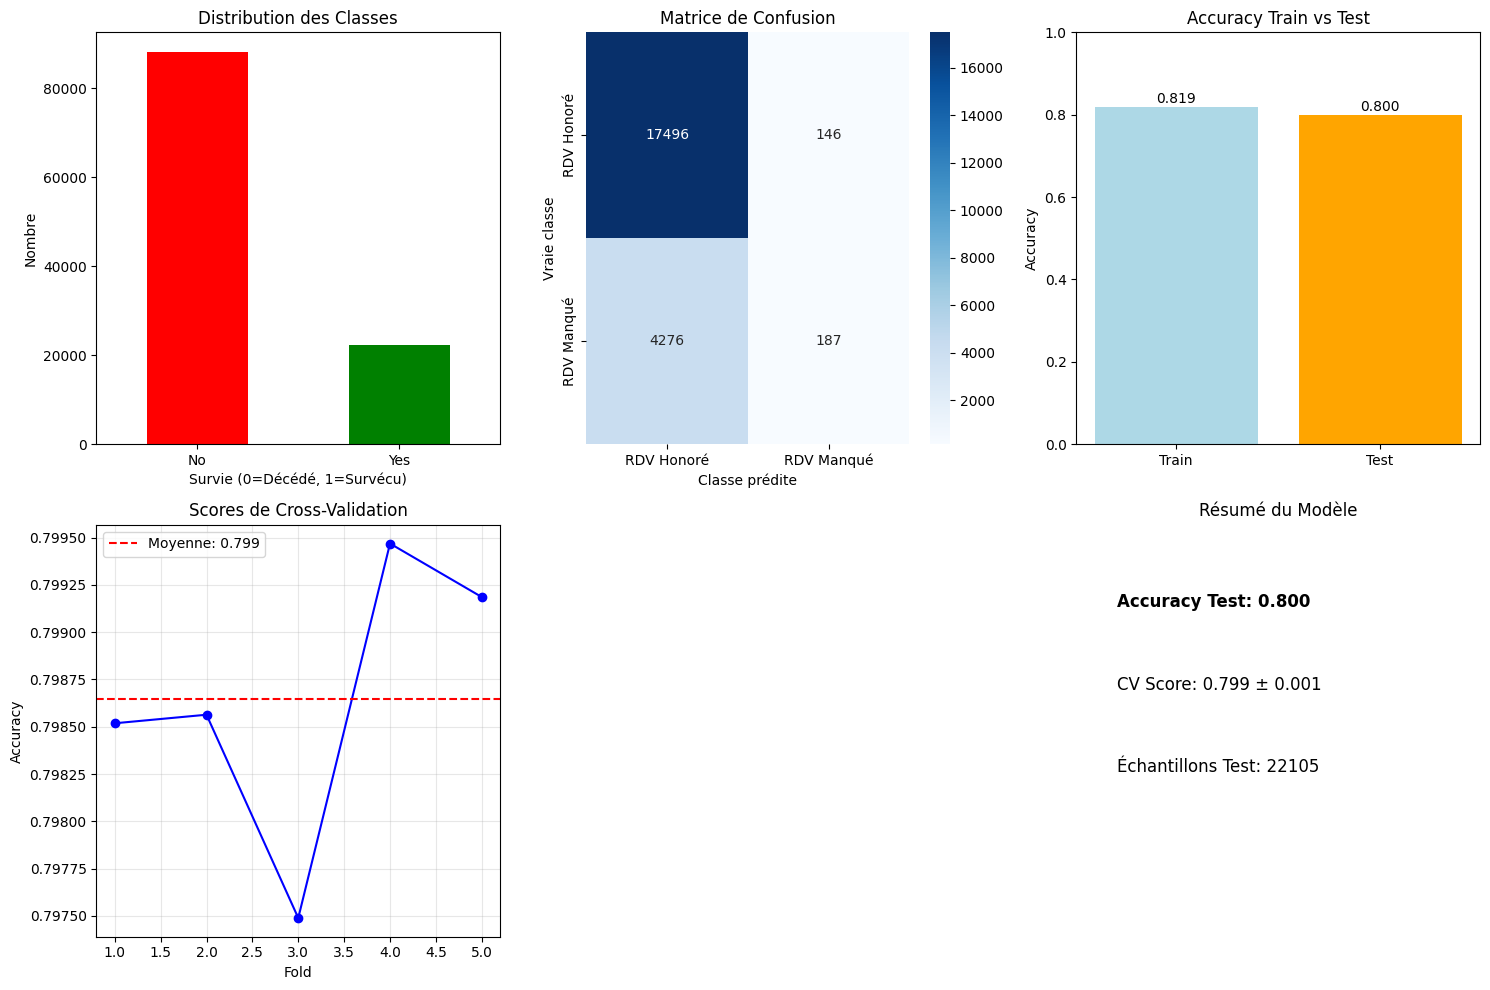


RÉSUMÉ DU PROJET ML
Tâche: Classification binaire (no show)
Modèle: Random Forest
Accuracy finale: 0.800
Score CV: 0.799 ± 0.001


In [18]:
# 11. VISUALISATION DES RÉSULTATS
print("\n=== VISUALISATION ===")

# Configuration des graphiques
plt.figure(figsize=(15, 10))

# 1. Distribution des classes
plt.subplot(2, 3, 1)
y.value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution des Classes')
plt.ylabel('Nombre')
plt.xlabel('Survie (0=Décédé, 1=Survécu)')
plt.xticks(rotation=0)

# 2. Matrice de confusion (heatmap)
plt.subplot(2, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['RDV Honoré', 'RDV Manqué'],
            yticklabels=['RDV Honoré', 'RDV Manqué'])
plt.title('Matrice de Confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# 3. Comparaison Train vs Test
plt.subplot(2, 3, 3)
scores = [train_accuracy, test_accuracy]
labels = ['Train', 'Test']
colors = ['lightblue', 'orange']
plt.bar(labels, scores, color=colors)
plt.title('Accuracy Train vs Test')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# 4. Scores de Cross-Validation
plt.subplot(2, 3, 4)
plt.plot(range(1, len(cv_scores) + 1), cv_scores, 'bo-')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
            label=f'Moyenne: {cv_scores.mean():.3f}')
plt.title('Scores de Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Feature Importance (si disponible)
# if hasattr(model_pipeline.named_steps['classifier'], 'feature_importances_'):
#     plt.subplot(2, 3, 5)
#     feature_names = numerical_features + categorical_features
#     importances = model_pipeline.named_steps['classifier'].feature_importances_
        
#     # Récupérer les vrais noms de features après transformation
#     preprocessor = model_pipeline.named_steps['preprocessor']
#     num_features = preprocessor.transformers_[0][2]
#     cat_encoder = preprocessor.transformers_[1][1].named_steps['encoder']
#     cat_features = cat_encoder.get_feature_names_out(preprocessor.transformers_[1][2])
#     feature_names_full = list(num_features) + list(cat_features)

#     # Tri par importance
#     indices = np.argsort(importances)[::-1]
    
#     plt.bar(range(len(importances)), importances[indices])
#     plt.title('Importance des Features')
#     plt.xlabel('Features')
#     plt.ylabel('Importance')
#     plt.xticks(range(len(importances)), 
#                [feature_names_full[i] for i in indices], rotation=45)

# 6. Résumé des métriques
plt.subplot(2, 3, 6)
plt.text(0.1, 0.8, f'Accuracy Test: {test_accuracy:.3f}', fontsize=12, fontweight='bold')
plt.text(0.1, 0.6, f'CV Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}', fontsize=12)
plt.text(0.1, 0.4, f'Échantillons Test: {len(y_test)}', fontsize=12)
# plt.text(0.1, 0.2, f'Features utilisées: {len(feature_names)}', fontsize=12)
plt.title('Résumé du Modèle')
plt.axis('off')

plt.tight_layout()
plt.show()

# 12. RÉSUMÉ FINAL
print("\n" + "="*50)
print("RÉSUMÉ DU PROJET ML")
print("="*50)
# print(f"Dataset: Titanic ({df.shape[0]} passagers)")
print(f"Tâche: Classification binaire (no show)")
print(f"Modèle: Random Forest")
print(f"Accuracy finale: {test_accuracy:.3f}")
print(f"Score CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print("="*50)

# # Exemple de prédiction sur de nouveaux données
# print("\n=== EXEMPLE DE PRÉDICTION ===")
# nouveau_passager = pd.DataFrame({
#     'Pclass': [1],
#     'Sex': ['female'],
#     'Age': [29],
#     'SibSp': [0],
#     'Parch': [0],
#     'Fare': [80],
#     'Embarked': ['C']
# })

# prediction = model_pipeline.predict(nouveau_passager)[0]
# proba = model_pipeline.predict_proba(nouveau_passager)[0]

# print(f"Nouveau passager: Femme, 29 ans, 1ère classe")
# print(f"Prédiction: {'Survécu' if prediction == 1 else 'Décédé'}")
# print(f"Probabilités: Décès={proba[0]:.2%}, Survie={proba[1]:.2%}")